In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read saved csv files
TrainVal     = pd.read_csv('000TrainVal.csv')

In [3]:
# map timestamp to a variable x
x = np.linspace(0,57600,57600)

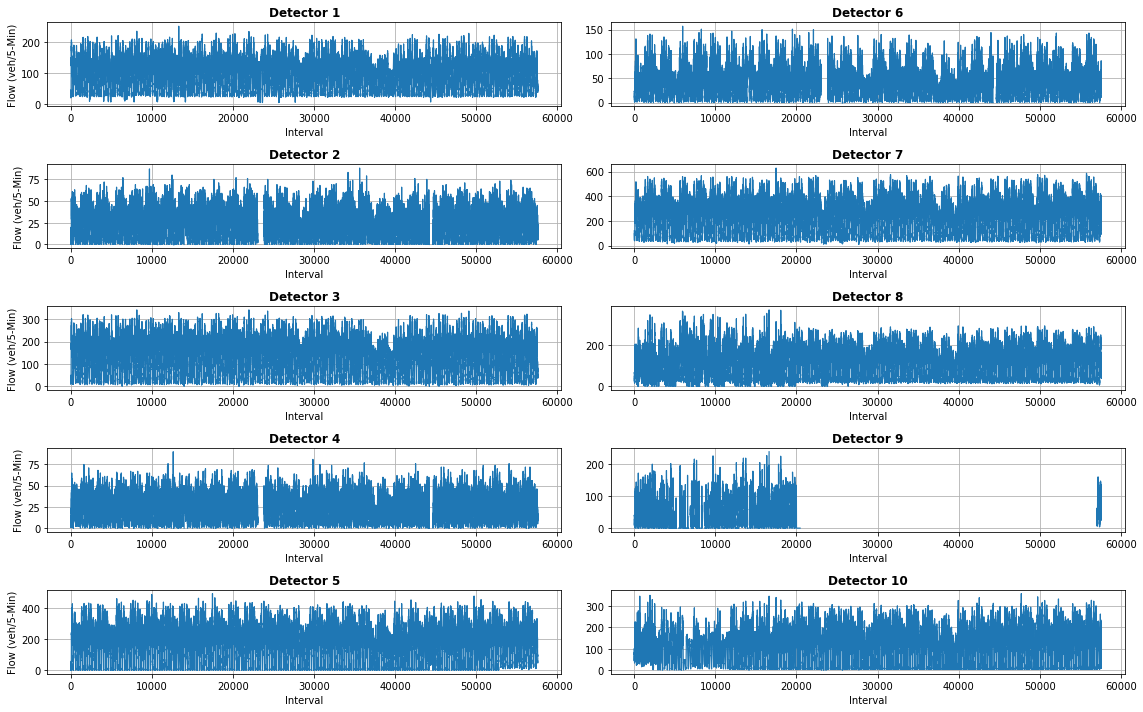

In [4]:
fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(16,10))

axes[0,0].plot(x,TrainVal['f1'], lw=1.2)
axes[1,0].plot(x,TrainVal['f2'], lw=1.2)
axes[2,0].plot(x,TrainVal['f3'], lw=1.2)
axes[3,0].plot(x,TrainVal['f4'], lw=1.2)
axes[4,0].plot(x,TrainVal['f5'], lw=1.2)
axes[0,1].plot(x,TrainVal['f6'], lw=1.2)
axes[1,1].plot(x,TrainVal['f7'], lw=1.2)
axes[2,1].plot(x,TrainVal['f8'], lw=1.2)
axes[3,1].plot(x,TrainVal['f9'], lw=1.2)
axes[4,1].plot(x,TrainVal['f10'], lw=1.2)


c = 0;
for b in range(0,2):
    for a in range(0,5):
        c += 1
        axes[a,b].set_xlabel('Interval')
        #axes[a,b].set_title('Detector '+str(c) +' (f'+str(c)+')',fontweight ="bold")
        axes[a,b].set_title('Detector '+str(c) ,fontweight ="bold")
        axes[a,b].grid()
        if b == 0:
            axes[a,b].set_ylabel('Flow (veh/5-Min)')

plt.tight_layout()
plt.show()

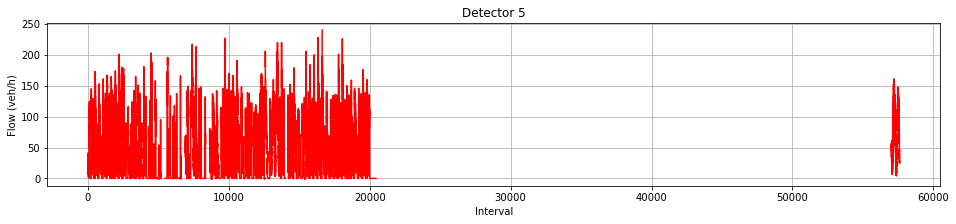

In [5]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.plot(x, TrainVal['f9'], 'r')
axes.set_xlabel('Interval')
axes.set_ylabel('Flow (veh/h)')
axes.set_title('Detector 5')
axes.grid()

In [6]:
TrainVal.isna().sum()

Timestamp        0
f1               5
f2            2066
f3               0
f4            2062
f5               3
f6            2065
f7               3
f8               1
f9           38052
f10              4
dtype: int64

### All detectors with missing values > 10 dropped

In [7]:
# Drop f1; all nan values
TrainVal.drop(columns=['f2','f4','f6','f9'],inplace=True)

In [8]:
TrainVal

,Timestamp,f1,f3,f5,f7,f8,f10
0,2017-08-17 00:00:00,46.0,38.0,0.0,121.0,65.0,87.0
1,2017-08-17 00:05:00,37.0,37.0,0.0,109.0,60.0,90.0
2,2017-08-17 00:10:00,45.0,43.0,0.0,105.0,61.0,87.0
3,2017-08-17 00:15:00,38.0,35.0,0.0,109.0,68.0,102.0
4,2017-08-17 00:20:00,36.0,30.0,30.0,94.0,61.0,93.0
...,...,...,...,...,...,...,...
57595,2018-03-04 23:35:00,46.0,41.0,70.0,118.0,64.0,52.0
57596,2018-03-04 23:40:00,39.0,37.0,53.0,93.0,43.0,28.0
57597,2018-03-04 23:45:00,48.0,54.0,45.0,94.0,39.0,16.0
57598,2018-03-04 23:50:00,43.0,43.0,57.0,112.0,39.0,11.0


In [9]:
cols = ['Timestamp','f1','f2','f3','f4','f5','f6']
TrainVal.columns = cols
TrainVal

,Timestamp,f1,f2,f3,f4,f5,f6
0,2017-08-17 00:00:00,46.0,38.0,0.0,121.0,65.0,87.0
1,2017-08-17 00:05:00,37.0,37.0,0.0,109.0,60.0,90.0
2,2017-08-17 00:10:00,45.0,43.0,0.0,105.0,61.0,87.0
3,2017-08-17 00:15:00,38.0,35.0,0.0,109.0,68.0,102.0
4,2017-08-17 00:20:00,36.0,30.0,30.0,94.0,61.0,93.0
...,...,...,...,...,...,...,...
57595,2018-03-04 23:35:00,46.0,41.0,70.0,118.0,64.0,52.0
57596,2018-03-04 23:40:00,39.0,37.0,53.0,93.0,43.0,28.0
57597,2018-03-04 23:45:00,48.0,54.0,45.0,94.0,39.0,16.0
57598,2018-03-04 23:50:00,43.0,43.0,57.0,112.0,39.0,11.0


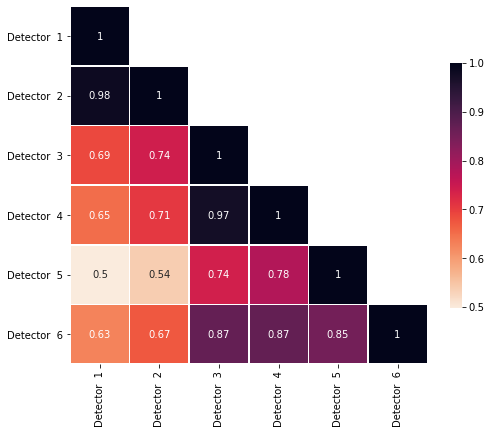

In [10]:
# The above as a plot

corr = TrainVal.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

labels = ['Detector  1','Detector  2','Detector  3','Detector  4','Detector  5','Detector  6']
crr.set_yticklabels(labels, rotation=0);
crr.set_xticklabels(labels, rotation=90);

### Street I980 (Oakland)

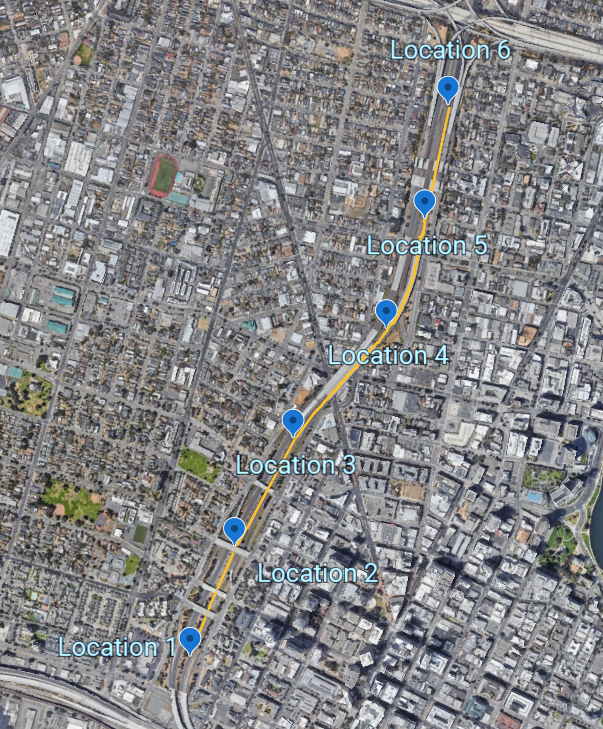

In [11]:
TrainVal

,Timestamp,f1,f2,f3,f4,f5,f6
0,2017-08-17 00:00:00,46.0,38.0,0.0,121.0,65.0,87.0
1,2017-08-17 00:05:00,37.0,37.0,0.0,109.0,60.0,90.0
2,2017-08-17 00:10:00,45.0,43.0,0.0,105.0,61.0,87.0
3,2017-08-17 00:15:00,38.0,35.0,0.0,109.0,68.0,102.0
4,2017-08-17 00:20:00,36.0,30.0,30.0,94.0,61.0,93.0
...,...,...,...,...,...,...,...
57595,2018-03-04 23:35:00,46.0,41.0,70.0,118.0,64.0,52.0
57596,2018-03-04 23:40:00,39.0,37.0,53.0,93.0,43.0,28.0
57597,2018-03-04 23:45:00,48.0,54.0,45.0,94.0,39.0,16.0
57598,2018-03-04 23:50:00,43.0,43.0,57.0,112.0,39.0,11.0


In [12]:
TrainVal.to_csv('00TrainVal.csv')